In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('resources/Vodafone_Customer_Churn_Sample_Dataset.csv')

In [39]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


/var/folders/2s/c36gzps966l7g26p24rbth540000gn/T/ipykernel_6465/119261429.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_churn = gender_churn.groupby('gender').apply(lambda x: pd.Series({


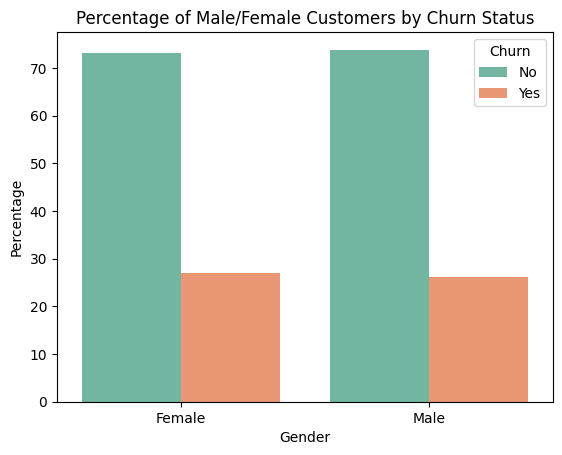

In [40]:
# Calculate percentages
gender_churn = df.groupby(['Churn', 'gender']).size().reset_index(name='Count')
gender_churn['Percentage'] = gender_churn['Count'] / gender_churn.groupby('gender')['Count'].transform('sum') * 100

gender_churn = gender_churn.groupby('gender').apply(lambda x: pd.Series({
    'Churned': x.loc[x['Churn'] == 'Yes', 'Percentage'].sum(),
    'Not Churned': x.loc[x['Churn'] == 'No', 'Percentage'].sum()
})).reset_index()

gender_churn = gender_churn.melt(id_vars='gender', var_name='Churn Status', value_name='Percentage')
gender_churn = df.groupby(['Churn', 'gender']).size().reset_index(name='Count')
gender_churn['Percentage'] = gender_churn['Count'] / gender_churn.groupby('gender')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=gender_churn, x='gender', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Male/Female Customers by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.show()

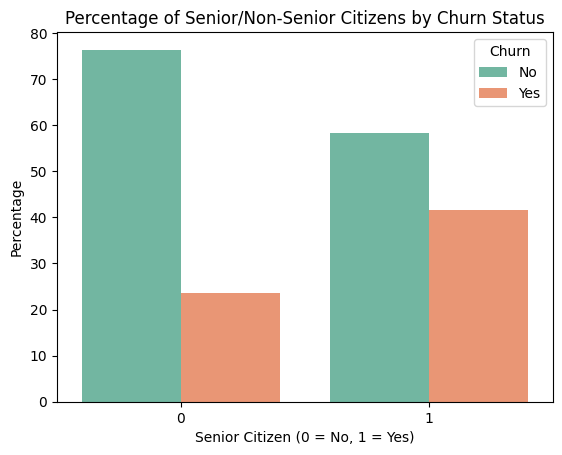

In [41]:
# Calculate percentages for senior citizens
senior_churn = df.groupby(['Churn', 'SeniorCitizen']).size().reset_index(name='Count')
senior_churn['Percentage'] = senior_churn['Count'] / senior_churn.groupby('SeniorCitizen')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=senior_churn, x='SeniorCitizen', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Senior/Non-Senior Citizens by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.show()

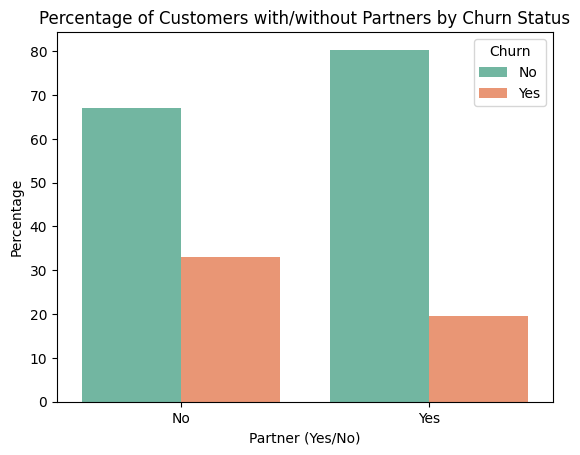

In [42]:
# Calculate percentages for partners
partner_churn = df.groupby(['Churn', 'Partner']).size().reset_index(name='Count')
partner_churn['Percentage'] = partner_churn['Count'] / partner_churn.groupby('Partner')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=partner_churn, x='Partner', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Partners by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Partner (Yes/No)')
plt.show()

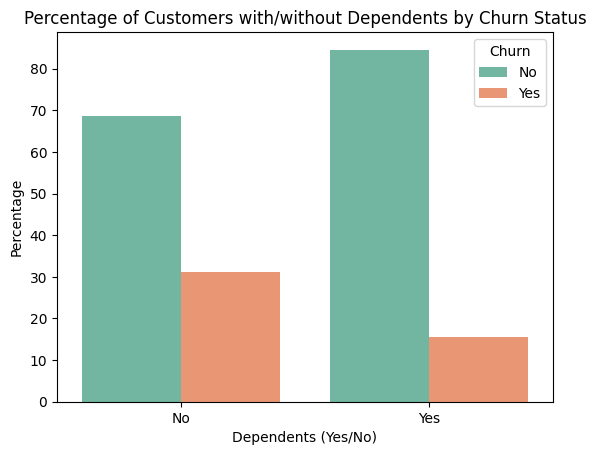

In [43]:
# Calculate percentages for dependents
dependents_churn = df.groupby(['Churn', 'Dependents']).size().reset_index(name='Count')
dependents_churn['Percentage'] = dependents_churn['Count'] / dependents_churn.groupby('Dependents')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=dependents_churn, x='Dependents', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Dependents by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Dependents (Yes/No)')
plt.show()

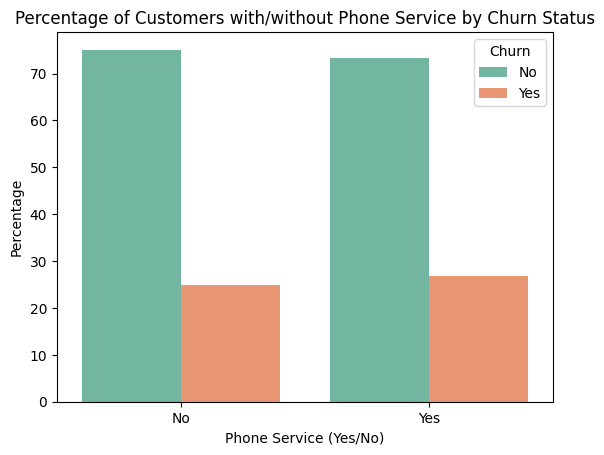

In [44]:
# Calculate percentages for phone service
phone_service_churn = df.groupby(['Churn', 'PhoneService']).size().reset_index(name='Count')
phone_service_churn['Percentage'] = phone_service_churn['Count'] / phone_service_churn.groupby('PhoneService')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=phone_service_churn, x='PhoneService', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Phone Service by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Phone Service (Yes/No)')
plt.show()

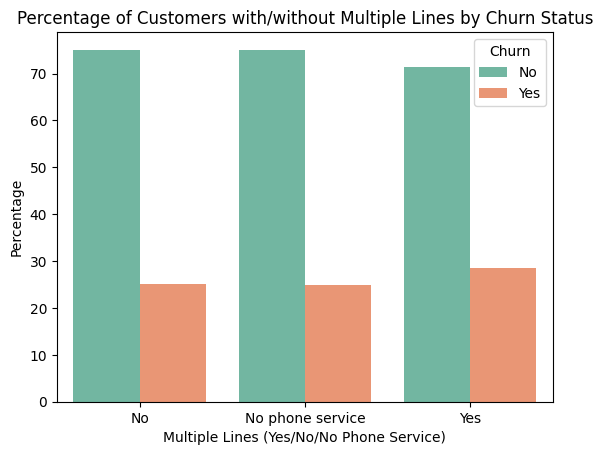

In [45]:
# Calculate percentages for multiple lines
multiple_lines_churn = df.groupby(['Churn', 'MultipleLines']).size().reset_index(name='Count')
multiple_lines_churn['Percentage'] = multiple_lines_churn['Count'] / multiple_lines_churn.groupby('MultipleLines')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=multiple_lines_churn, x='MultipleLines', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Multiple Lines by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Multiple Lines (Yes/No/No Phone Service)')
plt.show()

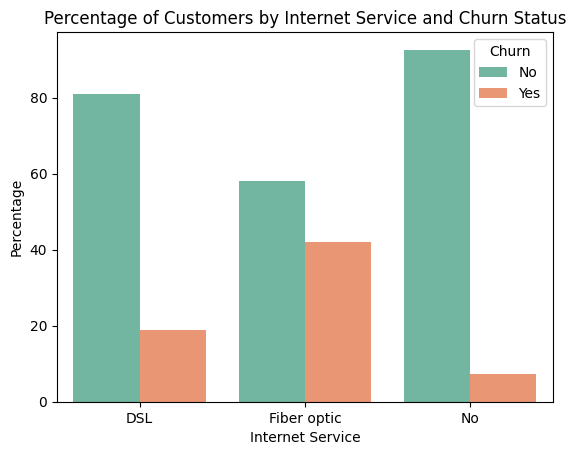

In [46]:
# Calculate percentages for internet service
internet_service_churn = df.groupby(['Churn', 'InternetService']).size().reset_index(name='Count')
internet_service_churn['Percentage'] = internet_service_churn['Count'] / internet_service_churn.groupby('InternetService')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=internet_service_churn, x='InternetService', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers by Internet Service and Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Internet Service')
plt.show()

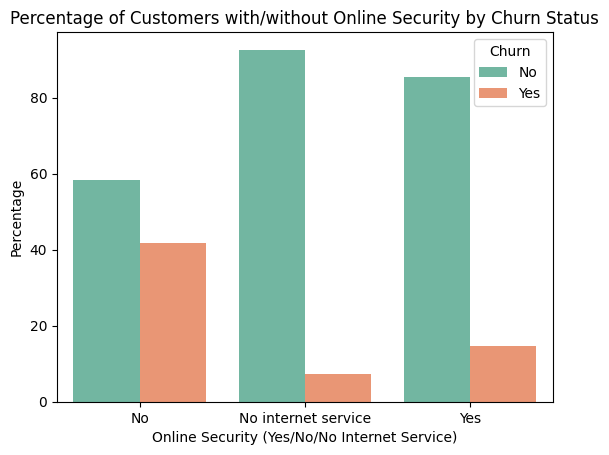

In [47]:
# Calculate percentages for online security
online_security_churn = df.groupby(['Churn', 'OnlineSecurity']).size().reset_index(name='Count')
online_security_churn['Percentage'] = online_security_churn['Count'] / online_security_churn.groupby('OnlineSecurity')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=online_security_churn, x='OnlineSecurity', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Online Security by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Online Security (Yes/No/No Internet Service)')
plt.show()

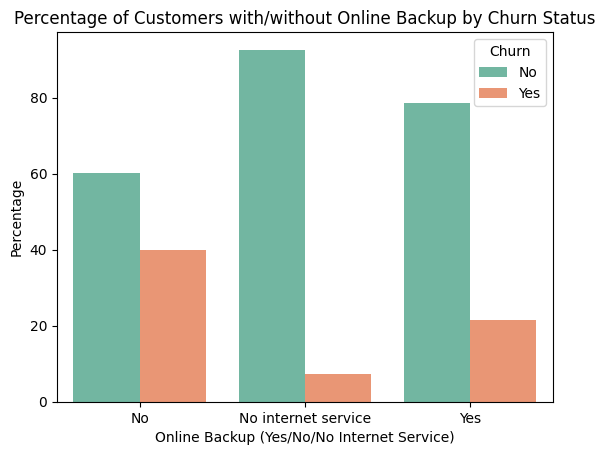

In [48]:
# Calculate percentages for online backup
online_backup_churn = df.groupby(['Churn', 'OnlineBackup']).size().reset_index(name='Count')
online_backup_churn['Percentage'] = online_backup_churn['Count'] / online_backup_churn.groupby('OnlineBackup')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=online_backup_churn, x='OnlineBackup', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Online Backup by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Online Backup (Yes/No/No Internet Service)')
plt.show()

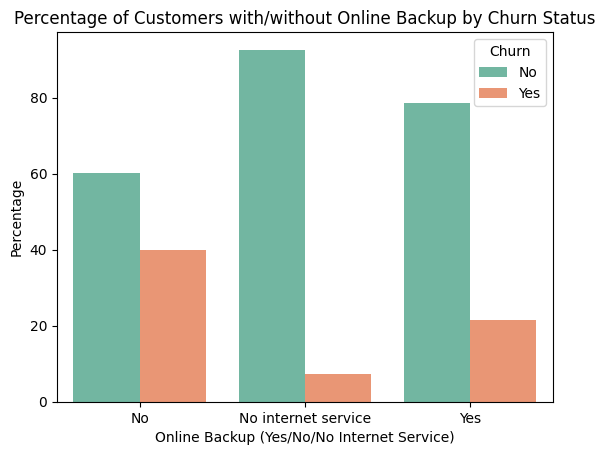

In [49]:
# Plot the histogram for online backup
sns.barplot(data=online_backup_churn, x='OnlineBackup', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Online Backup by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Online Backup (Yes/No/No Internet Service)')
plt.show()

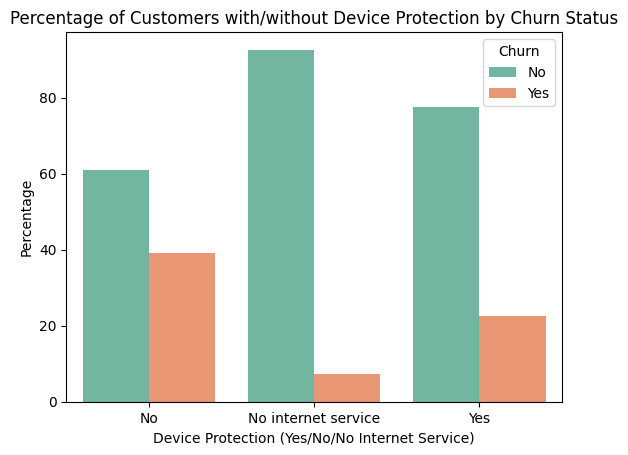

In [50]:
# Calculate percentages for device protection
device_protection_churn = df.groupby(['Churn', 'DeviceProtection']).size().reset_index(name='Count')
device_protection_churn['Percentage'] = device_protection_churn['Count'] / device_protection_churn.groupby('DeviceProtection')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=device_protection_churn, x='DeviceProtection', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Device Protection by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Device Protection (Yes/No/No Internet Service)')
plt.show()

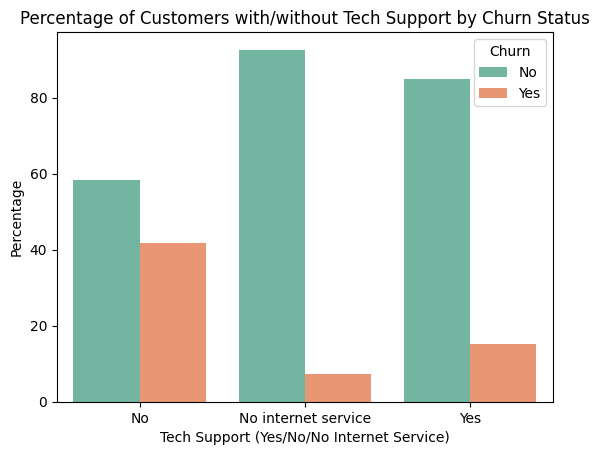

In [51]:
# Calculate percentages for tech support
tech_support_churn = df.groupby(['Churn', 'TechSupport']).size().reset_index(name='Count')
tech_support_churn['Percentage'] = tech_support_churn['Count'] / tech_support_churn.groupby('TechSupport')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=tech_support_churn, x='TechSupport', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Tech Support by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Tech Support (Yes/No/No Internet Service)')
plt.show()

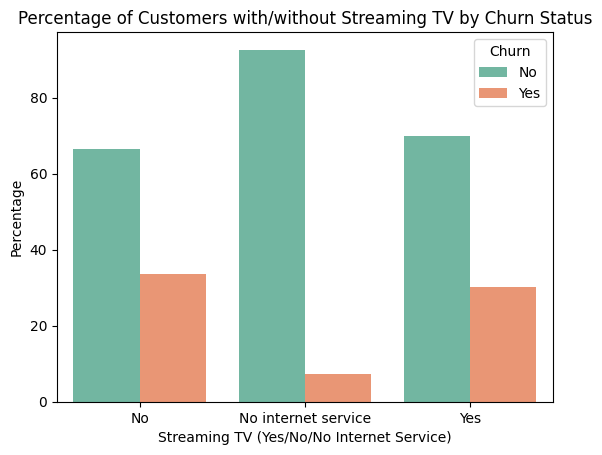

In [52]:
# Calculate percentages for streaming TV
streamingtv_churn = df.groupby(['Churn', 'StreamingTV']).size().reset_index(name='Count')
streamingtv_churn['Percentage'] = streamingtv_churn['Count'] / streamingtv_churn.groupby('StreamingTV')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=streamingtv_churn, x='StreamingTV', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Streaming TV by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Streaming TV (Yes/No/No Internet Service)')
plt.show()

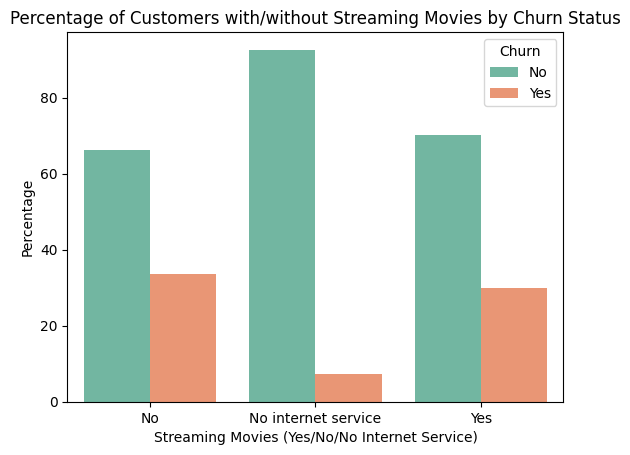

In [53]:
# Calculate percentages for streaming movies
streamingmovies_churn = df.groupby(['Churn', 'StreamingMovies']).size().reset_index(name='Count')
streamingmovies_churn['Percentage'] = streamingmovies_churn['Count'] / streamingmovies_churn.groupby('StreamingMovies')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=streamingmovies_churn, x='StreamingMovies', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Streaming Movies by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Streaming Movies (Yes/No/No Internet Service)')
plt.show()

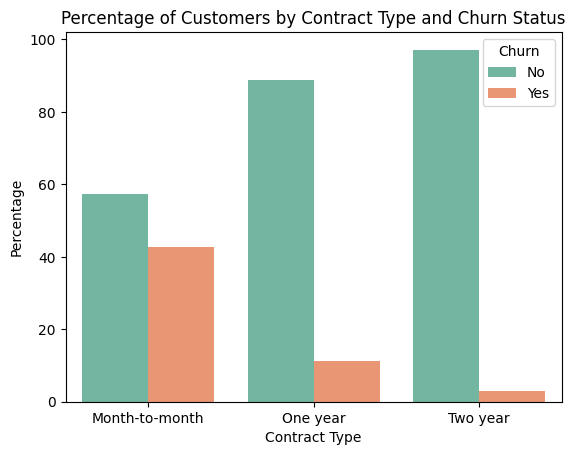

In [54]:
# Calculate percentages for contracts
contract_churn = df.groupby(['Churn', 'Contract']).size().reset_index(name='Count')
contract_churn['Percentage'] = contract_churn['Count'] / contract_churn.groupby('Contract')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=contract_churn, x='Contract', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers by Contract Type and Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Contract Type')
plt.show()

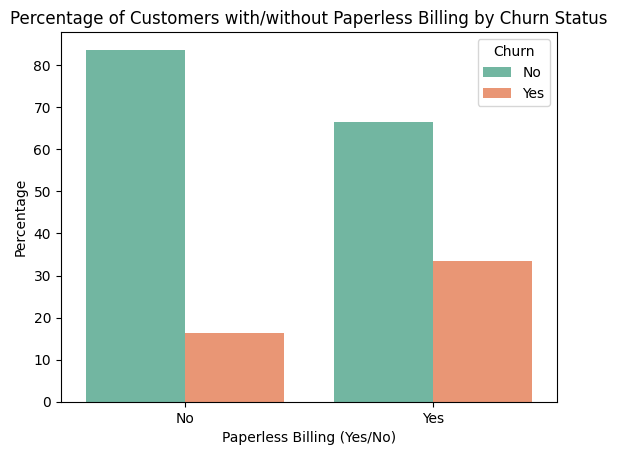

In [55]:
# Calculate percentages for paperless billing
paperless_billing_churn = df.groupby(['Churn', 'PaperlessBilling']).size().reset_index(name='Count')
paperless_billing_churn['Percentage'] = paperless_billing_churn['Count'] / paperless_billing_churn.groupby('PaperlessBilling')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=paperless_billing_churn, x='PaperlessBilling', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers with/without Paperless Billing by Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Paperless Billing (Yes/No)')
plt.show()

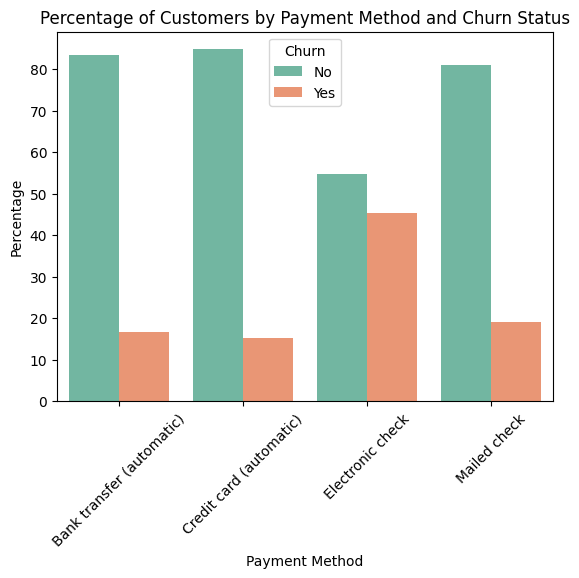

In [56]:
# Calculate percentages for payment methods
payment_method_churn = df.groupby(['Churn', 'PaymentMethod']).size().reset_index(name='Count')
payment_method_churn['Percentage'] = payment_method_churn['Count'] / payment_method_churn.groupby('PaymentMethod')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=payment_method_churn, x='PaymentMethod', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers by Payment Method and Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()

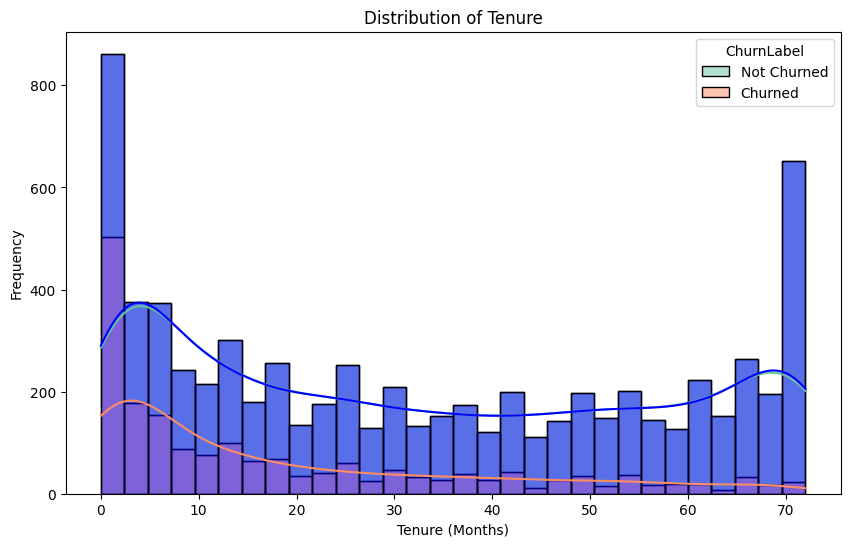

In [57]:
# Plot the distribution of tenure
df['ChurnLabel'] = df['Churn'].apply(lambda x: 'Churned' if x == 'Yes' else 'Not Churned')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', bins=30, kde=True, hue='ChurnLabel', palette='Set2', multiple='stack')
sns.histplot(df['tenure'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

/var/folders/2s/c36gzps966l7g26p24rbth540000gn/T/ipykernel_6465/402798727.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_charges_churn = df.groupby(['Churn', 'MonthlyChargesBin']).size().reset_index(name='Count')
/var/folders/2s/c36gzps966l7g26p24rbth540000gn/T/ipykernel_6465/402798727.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_charges_churn['Percentage'] = monthly_charges_churn['Count'] / monthly_charges_churn.groupby('MonthlyChargesBin')['Count'].transform('sum') * 100


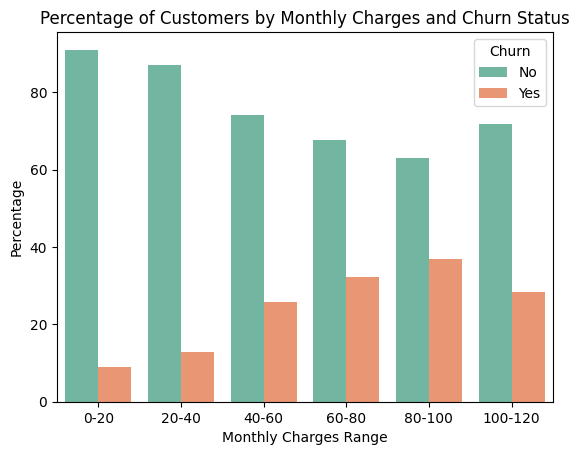

In [58]:
# Define bins for MonthlyCharges
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120']
df['MonthlyChargesBin'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, right=False)

# Calculate percentages for MonthlyCharges
monthly_charges_churn = df.groupby(['Churn', 'MonthlyChargesBin']).size().reset_index(name='Count')
monthly_charges_churn['Percentage'] = monthly_charges_churn['Count'] / monthly_charges_churn.groupby('MonthlyChargesBin')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=monthly_charges_churn, x='MonthlyChargesBin', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers by Monthly Charges and Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Monthly Charges Range')
plt.show()

/var/folders/2s/c36gzps966l7g26p24rbth540000gn/T/ipykernel_6465/1971876464.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_charges_churn = df.groupby(['Churn', 'TotalChargesBin']).size().reset_index(name='Count')
/var/folders/2s/c36gzps966l7g26p24rbth540000gn/T/ipykernel_6465/1971876464.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_charges_churn['Percentage'] = total_charges_churn['Count'] / total_charges_churn.groupby('TotalChargesBin')['Count'].transform('sum') * 100


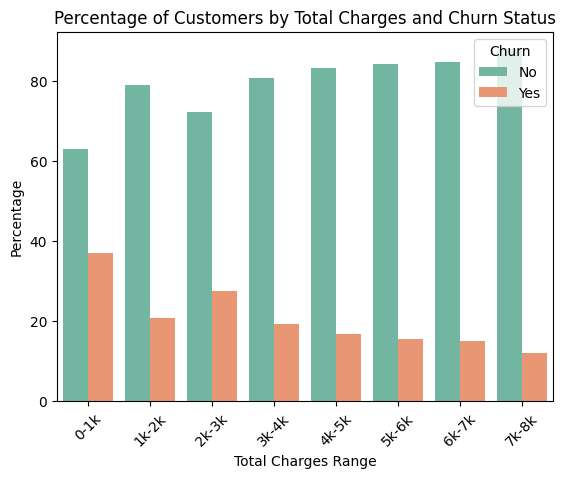

In [59]:
# Define bins for TotalCharges
bins_totalcharges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
labels_totalcharges = ['0-1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k-7k', '7k-8k']
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric, handling errors
df['TotalChargesBin'] = pd.cut(df['TotalCharges'], bins=bins_totalcharges, labels=labels_totalcharges, right=False)

# Calculate percentages for TotalCharges
total_charges_churn = df.groupby(['Churn', 'TotalChargesBin']).size().reset_index(name='Count')
total_charges_churn['Percentage'] = total_charges_churn['Count'] / total_charges_churn.groupby('TotalChargesBin')['Count'].transform('sum') * 100

# Plot the histogram
sns.barplot(data=total_charges_churn, x='TotalChargesBin', y='Percentage', hue='Churn', palette='Set2')
plt.title('Percentage of Customers by Total Charges and Churn Status')
plt.ylabel('Percentage')
plt.xlabel('Total Charges Range')
plt.xticks(rotation=45)
plt.show()

# Insights

- senior citizens churn more (natural causes?)
- customers without dependents churn more
- customers with fiber optics churn way more
- customers without online security, without online backup and without device protection churn more
- customers wihtout tech support churn more
- month-to-month customers churn more
- electronic check customers churn more
- customers tend to churn less the longer their tenure is
- customers tend to churn more the higher their monthly payment is

# ChatGPT API

In [60]:
import pdfplumber
# the guilines will be extracted from the pdf file in order to be used in the analysis
with pdfplumber.open('resources/Vodafone_Tone_of_Voice_Guidelines_for_Customer_Retention_Emails.pdf') as pdf:
    text = ''
    for page in pdf.pages:
        text += page.extract_text()

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


In [ ]:
import openai
import os

client = openai.OpenAI(api_key="YOUR_API_KEY")


In [28]:
guidelines = f"Here are the guidelines: {text}"

response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are an expert in customer retention emails. Follow these guidelines strictly: " + guidelines},
        {"role": "user", "content": "Write an email to a customer that has churned. Make them an offer to try to stay with us, related to fiber optics."},
    ]
)
print(response.choices[0].message.content)

Subject Line: "[Name], We Miss You! Enjoy Exclusive Fiber Optic Benefits with Vodafone"

Hi [Name],

We’ve noticed that you've taken a break from your Vodafone service, and we want to express how much we value having you as part of our family. Your loyalty has always been important to us, and we’d love the opportunity to welcome you back.

We’re excited to offer you an exclusive deal to experience the superior speed and reliability of our Fiber Optic service:

- **Special Welcome Back Discount:** Enjoy 20% off your first 6 months!
- **Early Access to Speed Upgrades:** Experience our latest enhancements before anyone else.
- **Priority Customer Support:** Our dedicated team is here to ensure your smooth transition back.

We’re committed to providing you with the best service possible, and we believe these benefits will greatly enhance your experience.

**Click here to explore your exclusive Fiber Optic benefits and reconnect with us.**

Thank you for considering Vodafone again. We look 

In [29]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are an expert in customer retention emails. Follow these guidelines strictly: " + guidelines},
        {"role": "user", "content": "Write an email to a customer that has churned. Make them an offer by lowering their monthly payment."},
    ]
)
print(response.choices[0].message.content)

Subject Line: "We Miss You, [Name]! Enjoy a Lower Monthly Payment Just for You!"

Hi [Name],

We hope this message finds you well. We’ve noticed you haven’t been with us lately, and we truly miss having you as part of the Vodafone family. To show our appreciation and to welcome you back, we have an exclusive offer just for you!

Here's what we have in store:

- **Lower Monthly Payment:** Enjoy a reduced rate that's easier on your wallet.
- **Priority Customer Support:** Because your satisfaction is our top priority.
- **Exclusive Access to New Features:** Be the first to experience our latest innovations.

We’re dedicated to providing you with the best service possible and would love the opportunity to serve you again.

**Click here to reactivate your account and enjoy these benefits.**

Thank you for considering coming back to us. Your loyalty means a lot, and we’re excited to have the opportunity to reconnect.

Best regards,

[Your Name]  
Vodafone Customer Care Team


In [30]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are an expert in customer retention emails. Follow these guidelines strictly: " + guidelines},
        {"role": "user", "content": "Write an email to a customer that has churned. Make them an offer concerning online security, online bakcup and tech support."},
    ]
)
print(response.choices[0].message.content)

Subject Line: "We Miss You, [Name]! Secure Your Digital World with Exclusive Offers"

Hi [Name],

We noticed that you've stepped away from Vodafone, and we're genuinely sorry to see you go. We'd love the opportunity to welcome you back with open arms and offer you something special.

At Vodafone, your safety and satisfaction are our top priorities. That’s why we’ve crafted a unique package just for you, designed to enhance your digital experience and provide peace of mind. Here’s how you can benefit:

- **Enhanced Online Security**: Shield your digital footprint with our latest online security features.
- **Reliable Online Backup**: Never lose a file again with our cutting-edge backup solutions.
- **Expert Tech Support**: Receive priority service from our dedicated support team, available 24/7.

We’re committed to giving you the best service possible, and these exclusive offers are our way of showing appreciation for your past loyalty. 

Click here to explore your exclusive benefits an